Czy regresja liniowa jest modelem odpowiednim dla danych data1.csv? Jak odpowiednio przygo-
tować dane do modelowania?

1 pkt. Zrób odpowiednie obliczenia i wizualizacje. Zapisz obserwacje i wnioski.
1 pkt. Zaproponuj jak przygotować dane lub przekształcić formułę, by móc do nich użyć modelu
regresji liniowej. Rozwiązanie podaj w postaci jednej funckji preprocess_data(X_train,
y_train), której działanie powinno być niezmiennicze na permutacje obserwacji w zbiorze
uczącym.

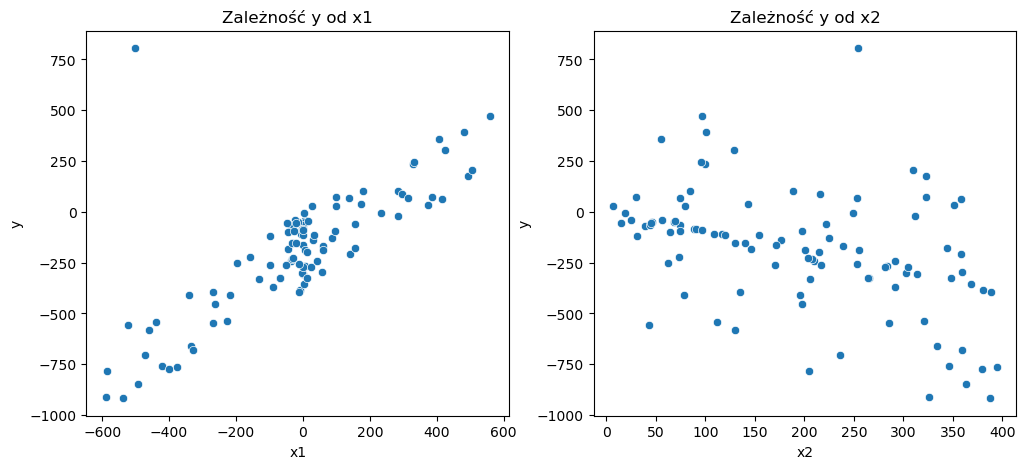

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px

data = pd.read_csv("data1.csv")
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sb.scatterplot(data=data, x="x1", y="y", ax=axes[0])
sb.scatterplot(data=data, x="x2", y="y", ax=axes[1])
axes[0].set_title("Zależność y od x1")
axes[1].set_title("Zależność y od x2")
plt.show()

fig = px.scatter_3d(
    data,
    x='x1',
    y='x2',
    z='y',
    color='y',
    color_continuous_scale='Viridis',
    title='Zależność między x1, x2 i y (interaktywny wykres 3D)',
    opacity=0.8,
)

fig.update_traces(marker=dict(size=5))
fig.update_layout(scene=dict(
    xaxis_title='x1',
    yaxis_title='x2',
    zaxis_title='y'
))

fig.show()

# Na wszystkich 3 wykresach widać jeden punkt - outliner który mocno popsułby dokładność
# modelu, zatem preprocessing go usunie 

def preprocess_data(X_train, Y_train):
    mean_y = Y_train.mean()
    std_y  = Y_train.std()
    work_data = X_train.copy()
    work_data["y"] = Y_train.values
    f = (work_data["y"] >= mean_y - 3 * std_y) & (work_data["y"] <= mean_y + 3 * std_y)

    filtered_data = work_data[f].reset_index(drop=True)
    X = filtered_data[["x1", "x2"]]
    Y = filtered_data["y"]
    return X, Y


Korzystając z biblioteki sklearn, dopasuj do danych data1.csv model regresji liniowej oraz sprawdź

jego skuteczność, korzystając z błędu średniokwadratowego. Sprawdź, jak użycie przygotowania da-
nych zaproponowanego w Zadaniu 1 wpływa na otrzymane wyniki.

.5 pkt Zaproponuj odpowiedni podział danych. Czy będzie on taki sam przy budowanie pojedynczego
modelu jak również w sytuacji, kiedy chcemy wybrać jeden spośród kilku modeli?

.5 pkt Zaproponuj model baseline’owy, czyli prostszy model, który posłuży nam jako punkt odniesie-
nia, czy uzyskane wyniki są akceptowalnej jakości.

.5 pkt Zbuduj model regresji liniowej i model baseline’nowy na rozpatrywanych wariantach danych
(po jednym dla surowych danych i danych po preprocessingu).
.5 pkt Przeprowadź ewaluację modeli. Wyniki przedstaw w formie tabeli.

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.dummy import DummyRegressor

X = data[["x1", "x2"]]
Y = data["y"]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# Klasyczny podział 80/20, dla wielu modeli i wyboru najlepszego trzebaby jakoś pokrzyżować 
# dane i wybrać różne fragmenty train i test dla każdego

# 1. Baseline przed preprocessingiem
baseline = DummyRegressor(strategy="mean")
baseline.fit(X_train, y_train)
#y_pred_baseline = baseline.predict(X_test)
r2_baseline = r2_score(y_test, baseline.predict(X_test))

# 2. Regresja liniowa przed preprocessingiem
linreg_raw = LinearRegression()
linreg_raw.fit(X_train, y_train)
r2_raw = r2_score(y_test, linreg_raw.predict(X_test))

X_train_clean, y_train_clean = preprocess_data(X_train, y_train)

# 3. Baseline po preprocessingu
baseline_clean = DummyRegressor(strategy="mean")
baseline_clean.fit(X_train_clean, y_train_clean)
r2_baseline_clean = r2_score(y_test, baseline_clean.predict(X_test))

# 4. Regresja po preprocessingu
linreg_clean = LinearRegression()
linreg_clean.fit(X_train_clean, y_train_clean)
r2_clean = r2_score(y_test, linreg_clean.predict(X_test))

print(f"Porównanie wyników dla 4 modeli: \n\
Model baseline przed preprocessingiem: {r2_baseline} \n\
Model regresji liniowej przed preprocessingiem: {r2_raw} \n\
Model baseline po preprocessingu: {r2_baseline_clean} \n\
Model regresji liniowej po preprocessingu: {r2_clean}")

Porównanie wyników dla 4 modeli: 
Model baseline przed preprocessingiem: -0.039327172262503485 
Model regresji liniowej przed preprocessingiem: 0.9845337936149866 
Model baseline po preprocessingu: -0.06110725998664135 
Model regresji liniowej po preprocessingu: 0.9999893343502771
